## 4. Gradient Boosting and Loss Functions

In this section, we will study the behaviour of the gradient descent algorithm and some loss functions not covered in the course.

`(a)` [1/2 point] In its standard version, the gradient boosting uses the mean squared error (MSE) as a loss function. Let us $r = y - \hat{y}$, the residual between the ground truth value $y$ and a prediction $\hat{y}$. Plot the MSE as a function of $r$.

To plot the Mean Squared Error (MSE) as a function of the residual $ r $ (where $ r = y - \hat{y} $), we first understand the MSE formula in this context. MSE measures the average squared difference between actual values and predicted values, but when focusing on a single prediction and its error, it simplifies to the square of the residual:

$ \text{MSE} = r^2 $

Here, $ r $ is $ y - \hat{y} $, and MSE simplifies to $ r^2 $ because it is the only term in the averaging sum for this single prediction scenario.

Let's plot $ r^2 $ against $ r $ to visualize how MSE changes with the residual $ r $:

In [1]:
using Plots  # Ensure Plots.jl is installed and loaded
using LaTeXStrings

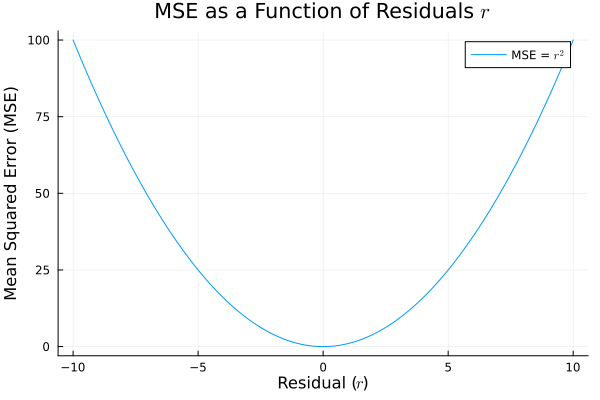

In [2]:
# Define the residual range
r = -10:0.1:10

# Calculate MSE for each residual value
mse = @. r ^ 2

# Plot MSE against residuals
plot(r, mse
    , label="MSE = " * L"r^2", title="MSE as a Function of Residuals " * L"r"
    , xlabel="Residual (" * L"r" * ")", ylabel="Mean Squared Error (MSE)"
    , legend=:topright
)

To define a range for $ r $, compute the MSE for each $ r $ value by squaring $ r $, and then plot these values. The plot will show a parabolic curve indicating that MSE increases quadratically as the absolute value of the residual increases, which reflects the nature of squaring residuals: the further away the prediction is from the actual value, the larger the error squared becomes.

You will see a plot illustrating how MSE varies with the residual $ r $, demonstrating that the error penalty increases exponentially as predictions deviate further from true values.

`(b)` [1 point] How do points associated with small residuals influence the learning process using gradient boosting? Those with large residuals?

In gradient boosting, the impact of residuals—whether small or large—on the learning process is crucial to understanding how the model iteratively improves its predictions:

- **Small residuals** lead to lesser adjustments in subsequent models, contributing to model stability and efficiency.
  
- **Large residuals** drive greater changes in the learning process, pushing the model to focus on areas of poor performance but at a risk of overfitting and increased complexity.

This dynamic adjustment is key to gradient boosting's ability to optimize model performance iteratively, allowing it to fine-tune predictions where needed while building robustness through the ensemble approach.

`(c)` [1 point] The Huber loss is a loss function that tries to compensate for the limitations of the squarred error loss. It is defined as:

$$
\mathcal{L}_{\delta}(r) = 
\begin{cases}
\frac{1}{2} r^2 & \quad , \text{ for } |r| \leq \delta \\
\delta(|r| - \frac{1}{2} \delta) & \quad , \text{ otherwise}
\end{cases}
$$

with $\delta$ a hyper-parameter that needs to be tuned and $r = y - \hat{y}$.
Draw a sketch of the Huber loss as a function of $r$ using $\delta = 1$. Indicate the following values in your sketch: $\mathcal{L}_{\delta}(-1)$,$\mathcal{L}_{\delta}(-0.5)$,$\mathcal{L}_{\delta}(-0)$,$\mathcal{L}_{\delta}(2)$. You may add any other points that you consider relevant. What happens as $\delta \to \infty$? as $\delta \to 0$?

In [1]:
# Define the Huber loss function
function 𝓛ₕ(r, δ)
    if abs(r) <= δ
        return 1/2 * r^2
    else
        return δ * (abs(r) - 1/2 * δ)
    end
end

𝓛ₕ (generic function with 1 method)

In [2]:
# Generate values for r
r = -1:.5:2
δ = 1;

In [3]:
# Calculate the Huber loss for each value of r
huber_values = [𝓛ₕ(ri, δ) for ri in r]; @show huber_values;

huber_values = [0.5, 0.125, 0.0, 0.125, 0.5, 1.0, 1.5]


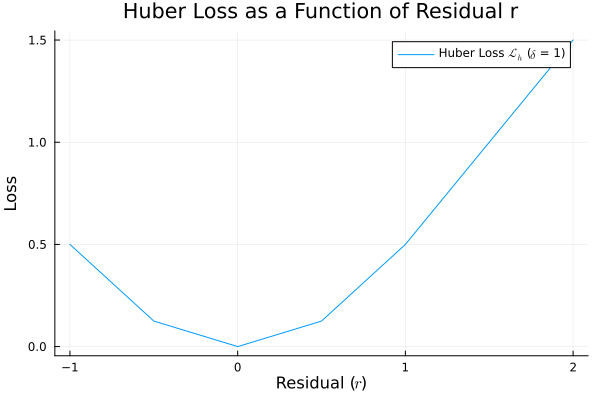

In [6]:
# Plot the Huber loss
plot(r, huber_values, label="Huber Loss " * L"\scrL_h" * " (" * L"\delta" * " = 1)"
    , title="Huber Loss as a Function of Residual r"
    , xlabel="Residual (" * L"r" * ")", ylabel="Loss"
    , legend=:topright
)

As $ \delta \to \infty $, the Huber loss approaches the absolute error loss. As $ \delta \to 0 $, the Huber loss approximates the squared error loss.

`(d)` [1 point] Based on the previous plot, how does the Huber loss tries to compensate the limitations observed when using the MSE.

The Huber loss compensates the limitations observed using the MSE by being less sensitive to outliers. For small residuals, it behaves like the MSE, but for large residuals, it grows linearly, reducing the impact of outliers.


`(e)` [1 point] A disadvantage of the Huber loss is that it is not smooth. The pseudo-Huber loss is an approximation of the Huber loss that, while preserving its strong ponts it is also smooth. It is defined as:

$$ L_{\delta}(y, \hat{y}) = \sum_{i}^{N} \delta^2 \left( \sqrt{1 +  \frac{ \left( y_i - \hat{y}_i \right) ^2 }{\delta}} - 1 \right). $$

Write the expression corresponding to the negative gradient of the pseudo-Huber loss.

___Reminder___: $\hat{y} = h(x)$

Let's calculate the gradient of the pseudo-Huber loss function with the given definition:

$ L_{\delta}(y, \hat{y}) = \sum_{i=1}^{N} \delta^2 \left( \sqrt{1 + \frac{(y_i - \hat{y}_i)^2}{\delta}} - 1 \right). $

Let's calculate the gradient $\frac{\partial L_{\delta}(y, \hat{y})}{\partial \hat{y}_i}$.

The pseudo-Huber loss function for a single example $i$ is:
$ l_{\delta}(y_i, \hat{y}_i) = \delta^2 \left( \sqrt{1 + \frac{(y_i - \hat{y}_i)^2}{\delta}} - 1 \right). $

Now, we take the derivative with respect to $\hat{y}_i$:
$ \frac{\partial l_{\delta}(y_i, \hat{y}_i)}{\partial \hat{y}_i} = \delta^2 \cdot \frac{\partial}{\partial \hat{y}_i} \left( \sqrt{1 + \frac{(y_i - \hat{y}_i)^2}{\delta}} - 1 \right). $

Since $\frac{\partial}{\partial \hat{y}_i} (-1) = 0$, we only need to differentiate:
$ \frac{\partial}{\partial \hat{y}_i} \left( \sqrt{1 + \frac{(y_i - \hat{y}_i)^2}{\delta}} \right). $

This derivative, using the chain rule:
$ \frac{\partial}{\partial \hat{y}_i} \left( \sqrt{1 + \frac{(y_i - \hat{y}_i)^2}{\delta}} \right) = \frac{1}{2} \left( 1 + \frac{(y_i - \hat{y}_i)^2}{\delta} \right)^{-\frac{1}{2}} \cdot \frac{\partial}{\partial \hat{y}_i} \left( \frac{(y_i - \hat{y}_i)^2}{\delta} \right). $

The derivative of the inner term:
$ \frac{\partial}{\partial \hat{y}_i} \left( \frac{(y_i - \hat{y}_i)^2}{\delta} \right) = 2 \cdot \frac{(y_i - \hat{y}_i)(-1)}{\delta} = -\frac{2(y_i - \hat{y}_i)}{\delta}. $

So,
$ \frac{\partial l_{\delta}(y_i, \hat{y}_i)}{\partial \hat{y}_i} = \delta^2 \cdot \frac{1}{2} \left( 1 + \frac{(y_i - \hat{y}_i)^2}{\delta} \right)^{-\frac{1}{2}} \cdot \left( -\frac{2(y_i - \hat{y}_i)}{\delta} \right). $

Simplify further:
$ \frac{\partial l_{\delta}(y_i, \hat{y}_i)}{\partial \hat{y}_i} = -\frac{y_i - \hat{y}_i}{\sqrt{1 + \frac{(y_i - \hat{y}_i)^2}{\delta}}}. $

The negative gradient of the pseudo-Huber loss, summed over all $N$ examples, is:
$ -\nabla_{\hat{y}} L_{\delta}(y, \hat{y}) = \sum_{i=1}^{N} \frac{y_i - \hat{y}_i}{\sqrt{1 + \frac{(y_i - \hat{y}_i)^2}{\delta}}}. $

This is the correct negative gradient for the function. It represents the direction in which $\hat{y}$ should be adjusted to decrease the loss, taking into account each $i$ and their respective prediction and actual values.

`(f)` We want to use gradient boosting with the pseudo-Huber loss. Explain how you can achieve this.

To use gradient boosting with the pseudo-Huber loss, compute the negative gradients of the pseudo-Huber loss for each iteration and fit the base learners (weak learners) to these gradients, updating the model to minimize the pseudo-Huber loss.

$ L_{\delta}(y, \hat{y}) = \sum_{i}^{N} \delta^2 \left( \sqrt{1 +  \frac{ \left( y_i - \hat{y}_i \right) ^2 }{\delta}} - 1 \right). $